zsh:1: command not found: mamba


In [37]:
!pip install pyalex
!pip install opinionated
!pip install datamapplot

  Using cached datamapplot-0.3.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached colorspacious-1.1.2-py2.py3-none-any.whl.metadata (3.6 kB)
  Using cached pylabeladjust-0.1.13-py3-none-any.whl.metadata (8.2 kB)
  Using cached colorcet-3.1.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached multipledispatch-1.0.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached param-2.1.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached pyct-0.5.0-py2.py3-none-any.whl.metadata (7.4 kB)
  Using cached toolz-0.12.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached xarray-2024.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached imageio-2.34.1-py3-none-any.whl.metadata (4.9 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached Pyqtree-1.0.0.tar.gz (5.2 kB)
  Preparing metadata (setup.py) ... done
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached partd-1.4.2-py3-none-any.whl.met

In [1]:
# https://openalex.org/

from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers, Funders
import pyalex
pyalex.config.email = "maximilian.noichl@uni-bamberg.de"

from itertools import chain
from tqdm.auto import tqdm

from compress_pickle import dump, load



/Users/Noich001/miniforge3/envs/network_epist_playground/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pyalex import Works
import pandas as pd


# https://openalex.org/works?page=1&filter=default.search%3A%22Personality%22%20AND%20%22Life%20Outcomes%22
# Create a query with the specified search terms
query = Works().search(['Perceptron']).filter(publication_year="<1979")
#.search(['"Personality" AND "Life outcomes"']).filter(publication_year=">2020")

records= []
for record in chain(*query.paginate(per_page=99,n_max=None)):
    records.append(record)
    print(len(records))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [3]:
df = pd.DataFrame(records)
df

id  \
0    https://openalex.org/W2040870580   
1    https://openalex.org/W2086789740   
2    https://openalex.org/W2008353316   
3    https://openalex.org/W4233045210   
4    https://openalex.org/W2056003475   
..                                ...   
696  https://openalex.org/W4240120616   
697  https://openalex.org/W2071444489   
698  https://openalex.org/W2083386541   
699  https://openalex.org/W2794370213   
700  https://openalex.org/W4247794185   

                                           doi  \
0             https://doi.org/10.1037/h0042519   
1                                         None   
2              https://doi.org/10.2307/1419730   
3           https://doi.org/10.21236/ad0256582   
4    https://doi.org/10.1103/revmodphys.34.123   
..                                         ...   
696         https://doi.org/10.1007/bf02474354   
697   https://doi.org/10.1109/pgec.1963.263582   
698   https://doi.org/10.1109/pgec.1963.263401   
699         https://doi.org/10.6028/nbs.tn.193   
700         https://doi.org/10.6028/nbs.tn.462   

                                                 title  \
0    The perceptron: A probabilistic model for info...   
1    Perceptrons: An Introduction to Computational ...   
2    Principles of Neurodynamics: Perceptrons and t...   
3    PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND T...   
4     The Perceptron: A Model for Brain Functioning. I   
..                                                 ...   
696                         Bibliography and abstracts   
697           Abstracts of Current Computer Literature   
698           Abstracts of Current Computer Literature   
699  A bibliography of foreign developments in mach...   
700              Nonnumeric data processing in Europe:   

                                          display_name  relevance_score  \
0    The perceptron: A probabilistic model for info...      6109.080600   
1    Perceptrons: An Introduction to Computational ...      3898.089800   
2    Principles of Neurodynamics: Perceptrons and t...      2515.316200   
3    PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND T...      2183.452400   
4     The Perceptron: A Model for Brain Functioning. I      1295.476600   
..                                                 ...              ...   
696                         Bibliography and abstracts         0.307640   
697           Abstracts of Current Computer Literature         0.307522   
698           Abstracts of Current Computer Literature         0.290180   
699  A bibliography of foreign developments in mach...         0.254770   
700              Nonnumeric data processing in Europe:         0.193156   

     publication_year publication_date  \
0                1958       1958-01-01   
1                1969       1969-01-01   
2                1963       1963-12-01   
3                1961       1961-03-15   
4                1962       1962-01-01   
..                ...              ...   
696              1965       1965-01-01   
697              1963       1963-06-01   
698              1963       1963-02-01   
699              1963       1963-01-01   
700              1968       1968-01-01   

                                                   ids language  \
0    {'openalex': 'https://openalex.org/W2040870580...       en   
1    {'openalex': 'https://openalex.org/W2086789740...       en   
2    {'openalex': 'https://openalex.org/W2008353316...       en   
3    {'openalex': 'https://openalex.org/W4233045210...       en   
4    {'openalex': 'https://openalex.org/W2056003475...       en   
..                                                 ...      ...   
696  {'openalex': 'https://openalex.org/W4240120616...       en   
697  {'openalex': 'https://openalex.org/W2071444489...       en   
698  {'openalex': 'https://openalex.org/W2083386541...       en   
699  {'openalex': 'https://openalex.org/W2794370213...       en   
700  {'openalex': 'https://openalex.org/W4247794185...       en   

                                 

In [4]:
all_referenced_works = [x for y in df['referenced_works'] for x in y]


# all_unique_referenced_works = list(set(all_referenced_works))

# from collections import Counter

# def remove_less_frequent_items(lst, n):
#     counts = Counter(lst)
#     return [item for item in lst if counts[item] > n]

# # Set to 0 for full set:
# n = 0
# filtered_referenced_works = remove_less_frequent_items(all_referenced_works, n) # remove 
# print(len(filtered_referenced_works))

filtered_referenced_works = list(set(all_referenced_works)) #remove duplicates from download list.
additional_works_to_download = [x for x in filtered_referenced_works if x not in  df['id']]



all_aditional_records =[]
block_len = 99
# Loop in blocks of 50
for i in tqdm(range(0, len(additional_works_to_download), block_len)):
    sublist = additional_works_to_download[i:i+block_len]
    ID_str = "|".join([x.replace('https://openalex.org/','') for  x in sublist])
    record_list = Works().filter(openalex_id=ID_str).get(per_page=block_len)
    print(len(record_list))
    for this_record in record_list:
        all_aditional_records.append(this_record)



  0%|          | 0/37 [00:00<?, ?it/s]

  3%|▎         | 1/37 [00:01<00:52,  1.47s/it]

99


  5%|▌         | 2/37 [00:02<00:47,  1.35s/it]

99


  8%|▊         | 3/37 [00:04<00:45,  1.33s/it]

99


 11%|█         | 4/37 [00:05<00:44,  1.35s/it]

98


 14%|█▎        | 5/37 [00:06<00:42,  1.32s/it]

99


 16%|█▌        | 6/37 [00:07<00:40,  1.31s/it]

99


 19%|█▉        | 7/37 [00:09<00:39,  1.33s/it]

99


 22%|██▏       | 8/37 [00:10<00:38,  1.32s/it]

99


 24%|██▍       | 9/37 [00:12<00:38,  1.36s/it]

99


 27%|██▋       | 10/37 [00:13<00:37,  1.40s/it]

98


 30%|██▉       | 11/37 [00:15<00:37,  1.45s/it]

99


 32%|███▏      | 12/37 [00:16<00:35,  1.43s/it]

99


 35%|███▌      | 13/37 [00:17<00:33,  1.38s/it]

99


 38%|███▊      | 14/37 [00:19<00:32,  1.41s/it]

98


 41%|████      | 15/37 [00:20<00:30,  1.37s/it]

99


 43%|████▎     | 16/37 [00:21<00:28,  1.34s/it]

99


 46%|████▌     | 17/37 [00:23<00:27,  1.37s/it]

98


 49%|████▊     | 18/37 [00:24<00:26,  1.39s/it]

99


 51%|█████▏    | 19/37 [00:26<00:25,  1.39s/it]

98


 54%|█████▍    | 20/37 [00:27<00:23,  1.39s/it]

99


 57%|█████▋    | 21/37 [00:29<00:24,  1.52s/it]

99


 59%|█████▉    | 22/37 [00:30<00:21,  1.46s/it]

98


 62%|██████▏   | 23/37 [00:32<00:20,  1.45s/it]

99


 65%|██████▍   | 24/37 [00:33<00:18,  1.44s/it]

99


 68%|██████▊   | 25/37 [00:34<00:16,  1.39s/it]

99


 70%|███████   | 26/37 [00:35<00:14,  1.33s/it]

99


 73%|███████▎  | 27/37 [00:37<00:13,  1.37s/it]

98


 76%|███████▌  | 28/37 [00:39<00:13,  1.45s/it]

99


 78%|███████▊  | 29/37 [00:40<00:11,  1.41s/it]

99


 81%|████████  | 30/37 [00:41<00:09,  1.37s/it]

99


 84%|████████▍ | 31/37 [00:42<00:08,  1.36s/it]

99


 86%|████████▋ | 32/37 [00:44<00:07,  1.43s/it]

98


 89%|████████▉ | 33/37 [02:00<01:35, 23.91s/it]

98


 92%|█████████▏| 34/37 [02:02<00:51, 17.20s/it]

99


 95%|█████████▍| 35/37 [02:03<00:24, 12.44s/it]

99


 97%|█████████▋| 36/37 [02:05<00:09,  9.08s/it]

98


100%|██████████| 37/37 [02:05<00:00,  3.40s/it]

11


In [5]:
all_additional_records_df = pd.DataFrame(all_aditional_records)

In [6]:
all_additional_records_df

id  \
0     https://openalex.org/W2061171222   
1     https://openalex.org/W2170716495   
2     https://openalex.org/W4299725134   
3     https://openalex.org/W1974511160   
4     https://openalex.org/W1969005071   
...                                ...   
3560  https://openalex.org/W1982436972   
3561  https://openalex.org/W2163999518   
3562  https://openalex.org/W2155306255   
3563  https://openalex.org/W2139287113   
3564  https://openalex.org/W3027658741   

                                                    doi  \
0     https://doi.org/10.1090/s0025-5718-1965-0178586-1   
1                                                  None   
2                       https://doi.org/10.2307/2091967   
3             https://doi.org/10.1017/s0305004100030401   
4         https://doi.org/10.1016/s0019-9958(67)91165-5   
...                                                 ...   
3560                 https://doi.org/10.1007/bf00293848   
3561           https://doi.org/10.1109/tec.1959.5222056   
3562           https://doi.org/10.1109/tec.1958.5222530   
3563           https://doi.org/10.1109/tac.1965.1098108   
3564                    https://doi.org/10.2307/2022340   

                                                  title  \
0     An algorithm for the machine calculation of co...   
1                       Aspects of the Theory of Syntax   
2                   Social Theory and Social Structure.   
3                    A generalized inverse for matrices   
4                  Language identification in the limit   
...                                                 ...   
3560  Über die Nachrichtenverarbeitung in der Nerven...   
3561                Synthesis of Minimal-State Machines   
3562  An Optimum Character Recognition System Using ...   
3563  A two-parameter adaptive system using a sinuso...   
3564  Sense-Datum Theory and Observational Fact: Som...   

                                           display_name  publication_year  \
0     An algorithm for the machine calculation of co...              1965   
1                       Aspects of the Theory of Syntax              1965   
2                   Social Theory and Social Structure.              1969   
3                    A generalized inverse for matrices              1955   
4                  Language identification in the limit              1967   
...                                                 ...               ...   
3560  Über die Nachrichtenverarbeitung in der Nerven...              1961   
3561                Synthesis of Minimal-State Machines              1959   
3562  An Optimum Character Recognition System Using ...              1958   
3563  A two-parameter adaptive system using a sinuso...              1965   
3564  Sense-Datum Theory and Observational Fact: Som...              1958   

     publication_date                                                ids  \
0          1965-01-01  {'openalex': 'https://openalex.org/W2061171222...   
1          1965-05-01  {'openalex': 'https://openalex.org/W2170716495...   
2          1969-08-01  {'openalex': 'https://openalex.org/W4299725134...   
3          1955-07-01  {'openalex': 'https://openalex.org/W1974511160...   
4          1967-05-01  {'openalex': 'https://openalex.org/W1969005071...   
...               ...                                                ...   
3560       1961-01-01  {'openalex': 'https://openalex.org/W1982436972...   
3561       1959-12-01  {'openalex': 'https://openalex.org/W2163999518...   
3562       1958-06-01  {'openalex': 'https://openalex.org/W2155306255...   
3563       1965-04-01  {'openalex': 'https://openalex.org/W2139287113...   
3564       1958-01-02  {'openalex': 'https://openalex.org/W3027658741...   

     language                                   primary_location     type  \
0          en  {'is_oa': True, 'landing_page_url': 'https://d...  article   
1          en  {'is_oa': False, 'landing_page_url': 'https://...     book   
2          en  {'is_oa': False, 'landing_pag

In [7]:
total_record_set = pd.concat([df, all_additional_records_df])

In [8]:
import networkx as nx
import json


# Create a directed graph
G = nx.DiGraph()


# Add nodes and edges
for ix,row in tqdm(df.iterrows()):
    for author in row['authorships']:
        this_author = author['author']['id'] 
        
        if this_author not in G.nodes():
            G.add_node(this_author)
            G.nodes()[this_author]['authored_paper_count'] = 1
            G.nodes()[this_author]['cited_count'] = 0
            G.nodes()[this_author]['titles'] = [row['title']]
            

        else:
            G.nodes()[this_author]['authored_paper_count'] += 1
            G.nodes()[this_author]['titles'].append(row['title'])
        
        
        for cited_work_id in row["referenced_works"]:
            cited_work = all_additional_records_df[all_additional_records_df['id'] == cited_work_id] # This fails silently if citations are not present!
            if len(cited_work) >= 1: # In case of multiple hits (shouldn't happen once sampling is fixed)
                cited_work = cited_work.iloc[0]
                
            for cited_author in cited_work['authorships']:
                cited_author = cited_author['author']['id'] 
                
                if cited_author not in G.nodes():
                    G.add_node(cited_author)
                    G.nodes()[cited_author]['cited_count'] = 1
                    G.nodes()[cited_author]['authored_paper_count'] = 0
                    G.nodes()[cited_author]['titles'] = [cited_work['title']]
                    
                else:
                    G.nodes()[cited_author]['cited_count'] += 1
                    G.nodes()[cited_author]['titles'].append(cited_work['title'])
                
                
                if G.has_edge(this_author, cited_author):  # edges go FROM citing TO cited
                    G[this_author][cited_author]['weight'] += 1
                else:
                    G.add_edge(this_author, cited_author, weight=1)
                        
                

    # for 
#     G.add_node(item["id"])  # Add each work as a node
#     for related in item["referenced_works"]:
#         G.add_edge(item["id"], related)  # Create an edge from this work to each related work

# # Optionally, you can print the nodes and edges to verify
print("Nodes in the network:")
print(len(G.nodes()))
# print("Edges in the network:")
# print(len(G.edges()))
G.nodes(data=True)
print("Edges in the network:")
print(len(G.edges()))

701it [00:01, 362.07it/s]

Nodes in the network:
4412
Edges in the network:
9106


In [9]:
# Extract largest component:
largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc)

4.346689400397841
1.0


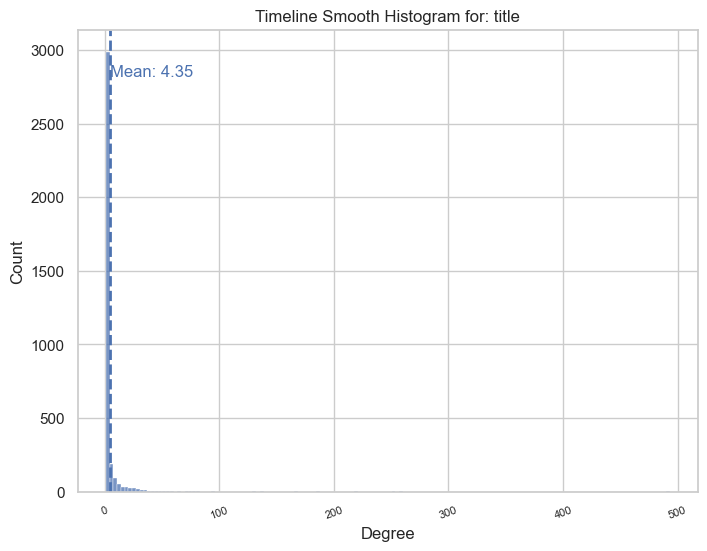

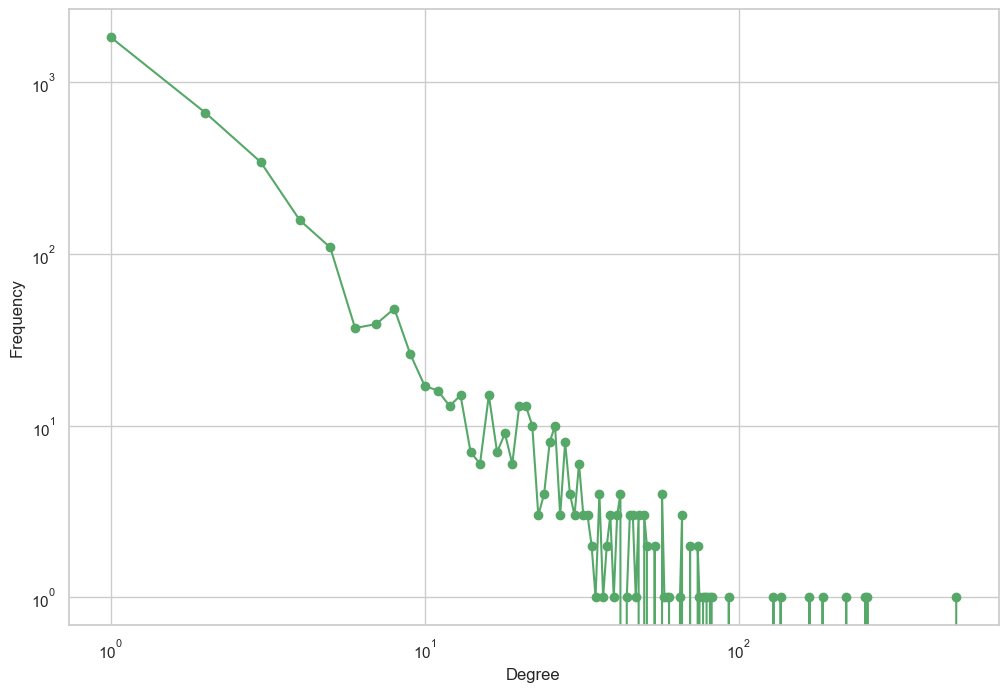

In [79]:
# Plotting functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_network_degree_distribution(G, title):
    degrees = np.array([degree for node, degree in G.degree()])
    # Create the histogram with a KDE
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.histplot(degrees, kde=False, bins=150, stat="count")
    # Calculate the mean
    mean_value = np.mean(degrees)
    print(mean_value)
    print(np.median(degrees))

    # Plot a vertical line at the mean value
    plt.axvline(mean_value, color='b', linestyle='--', linewidth=2)
    plt.text(mean_value + 0.1, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(mean_value), color='b')

    plt.title('Timeline Smooth Histogram for: ' + title)
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.xticks(fontsize=8,rotation=20)
    plt.show()
    
def plot_loglog(G,m=10):
    degree_freq = nx.degree_histogram(G)
    degrees = range(len(degree_freq))
    plt.figure(figsize=(12, 8))
    plt.loglog(degrees[m:], degree_freq[m:],'go-')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')

plot_network_degree_distribution(G, 'title')
plot_loglog(G,m=1)

In [10]:
nodes_with_one_link = [node for node, degree in G.degree() if degree <= 1]

G_more_than_one_link = G.copy()
#G_more_than_one_link.remove_nodes_from(nodes_with_one_link)


In [11]:
print("Nodes in the network:")
print(len(G_more_than_one_link.nodes()))

print("Edges in the network:")
print(len(G_more_than_one_link.edges()))

Nodes in the network:
3519
Edges in the network:
7648


In [12]:
#conda install -c conda-forge graph-tool


In [13]:
import graph_tool.all as gt

# Convert NetworkX graph to graph_tool graph
g = gt.Graph(directed=True)

# Create a mapping from NetworkX nodes to graph_tool vertices
node_map = {n: g.add_vertex() for n in G_more_than_one_link.nodes()}

# Add edges to the graph_tool graph
for u, v in G_more_than_one_link.edges():
    g.add_edge(node_map[u], node_map[v])

# Optionally, you can print the graph_tool graph's vertices and edges to verify
print("Nodes in the graph_tool network:")
print(g.num_vertices())
print("Edges in the graph_tool network:")
print(g.num_edges())

Nodes in the graph_tool network:
3519
Edges in the graph_tool network:
7648


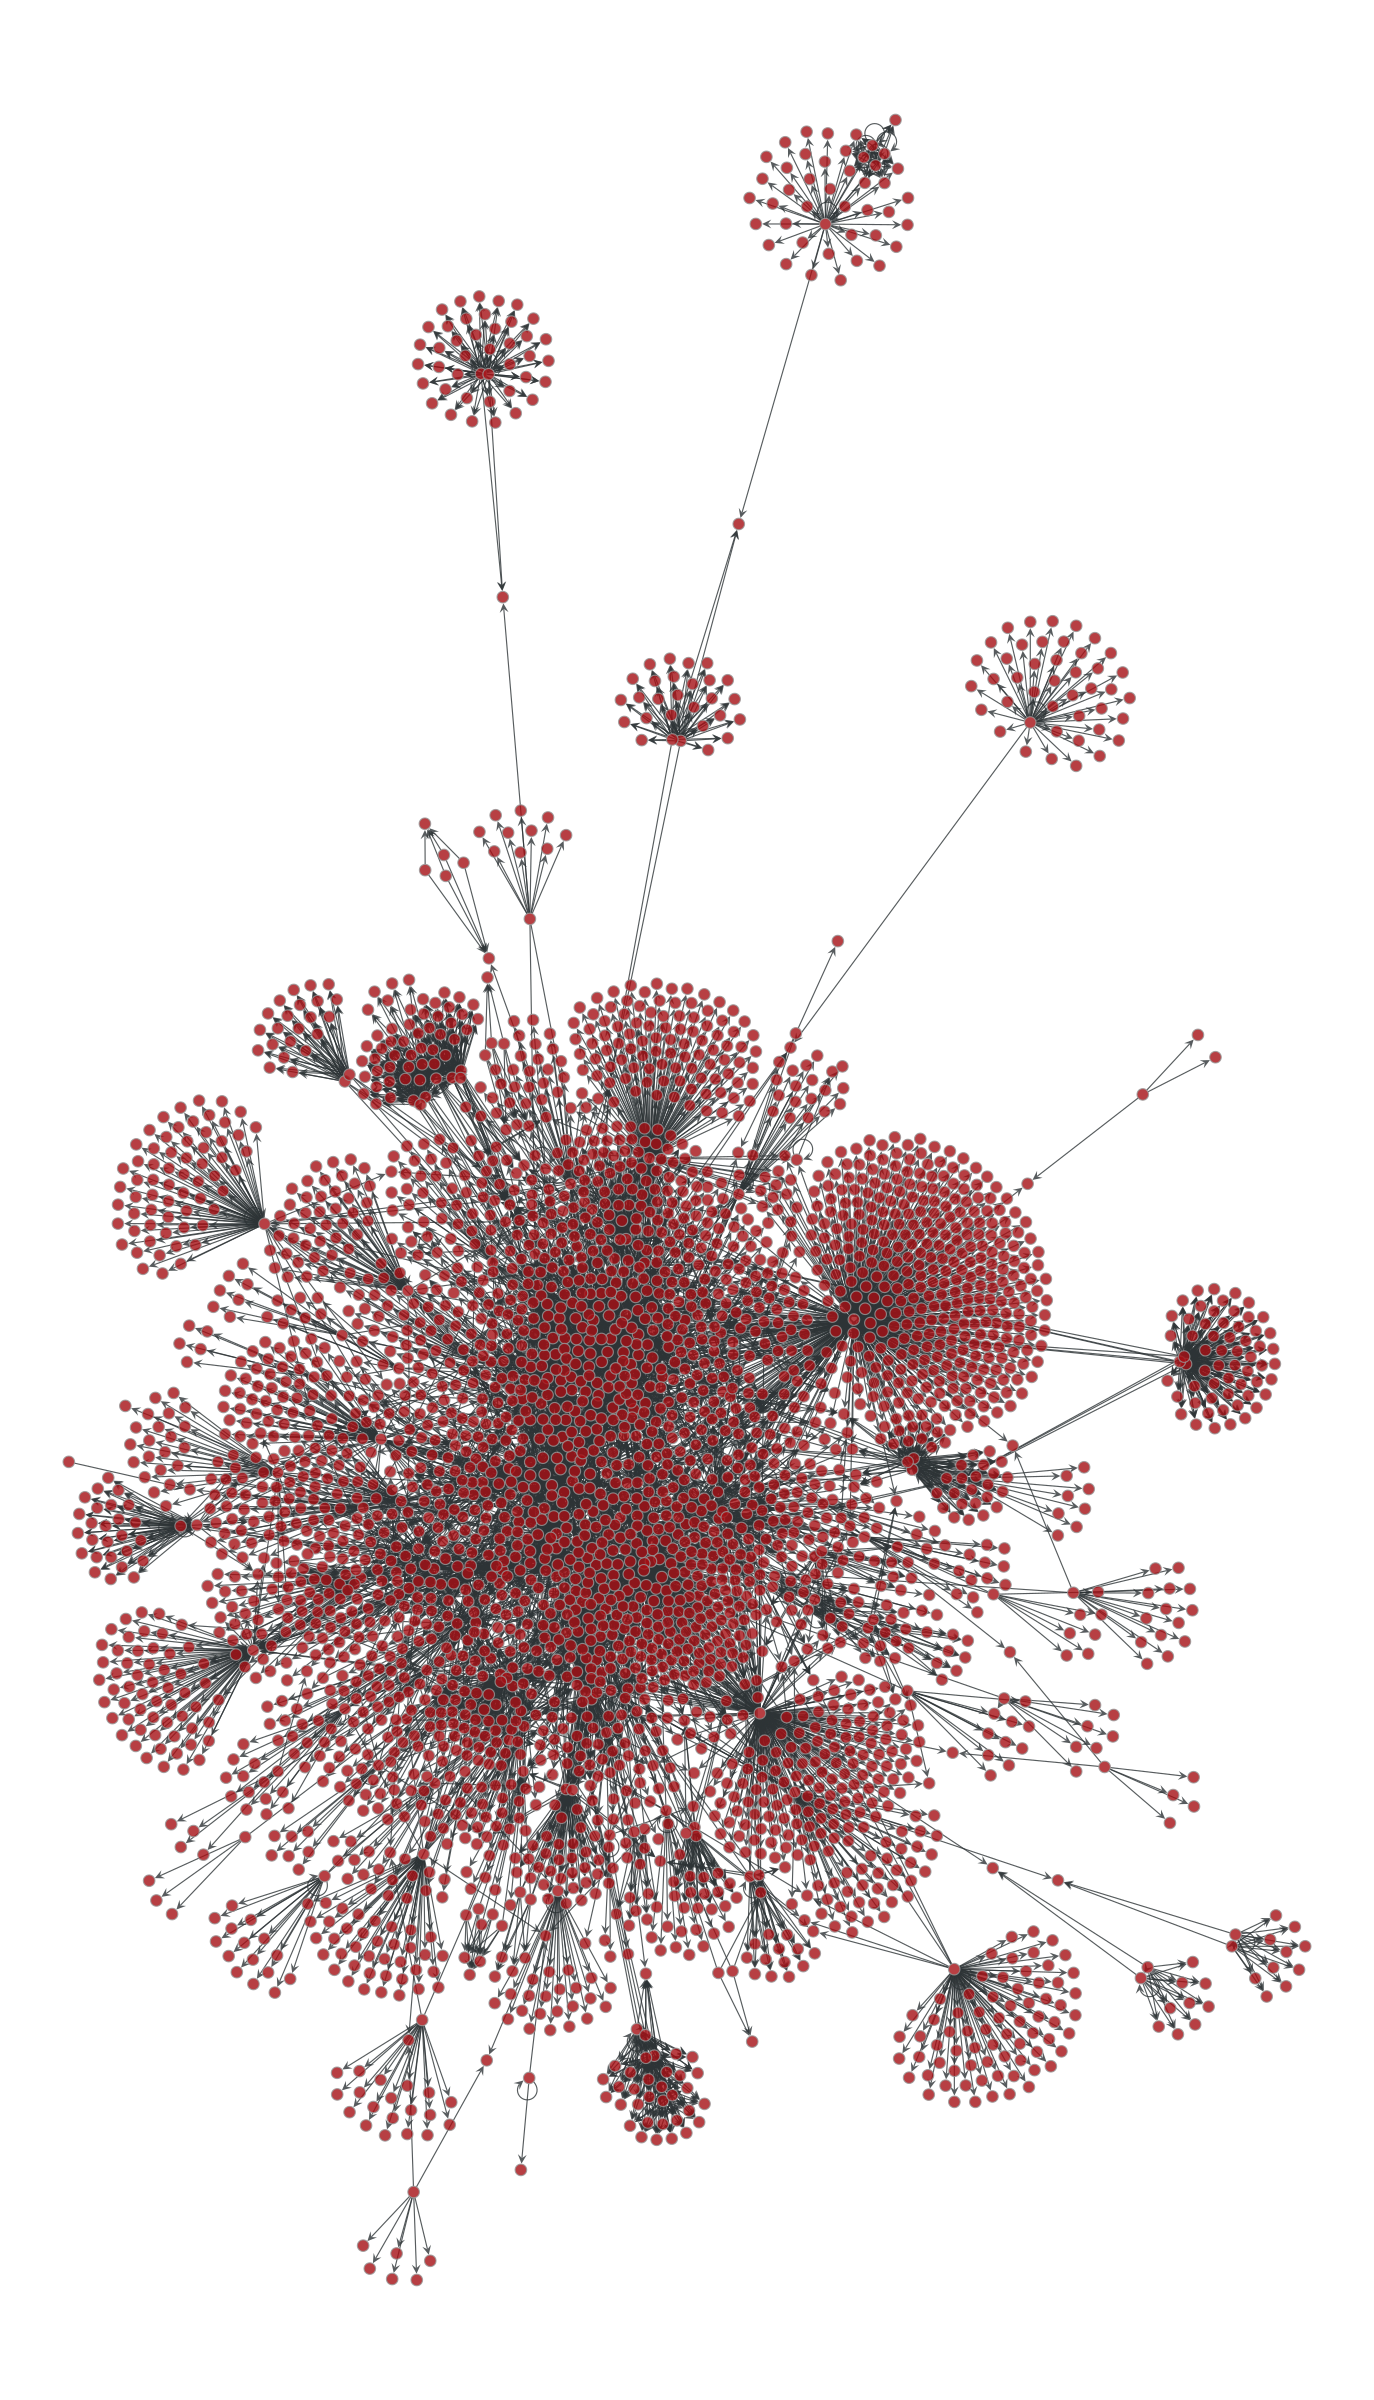

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2cd2e68d0, at 0x2dbb60f20>

In [14]:
from graph_tool.all import *
import matplotlib
import numpy as np

#g = extract_largest_component(g, directed=False)
pos = sfdp_layout(g)


dprms = dict(fmt="png",  output_size=(1200, 1200))

graph_draw(g, pos, **dprms)
        #    , vertex_fill_color=g.vp.value, vcmap=matplotlib.cm.coolwarm,
        #    vcnorm=matplotlib.colors.Normalize(vmin=0, vmax=1), **dprms)

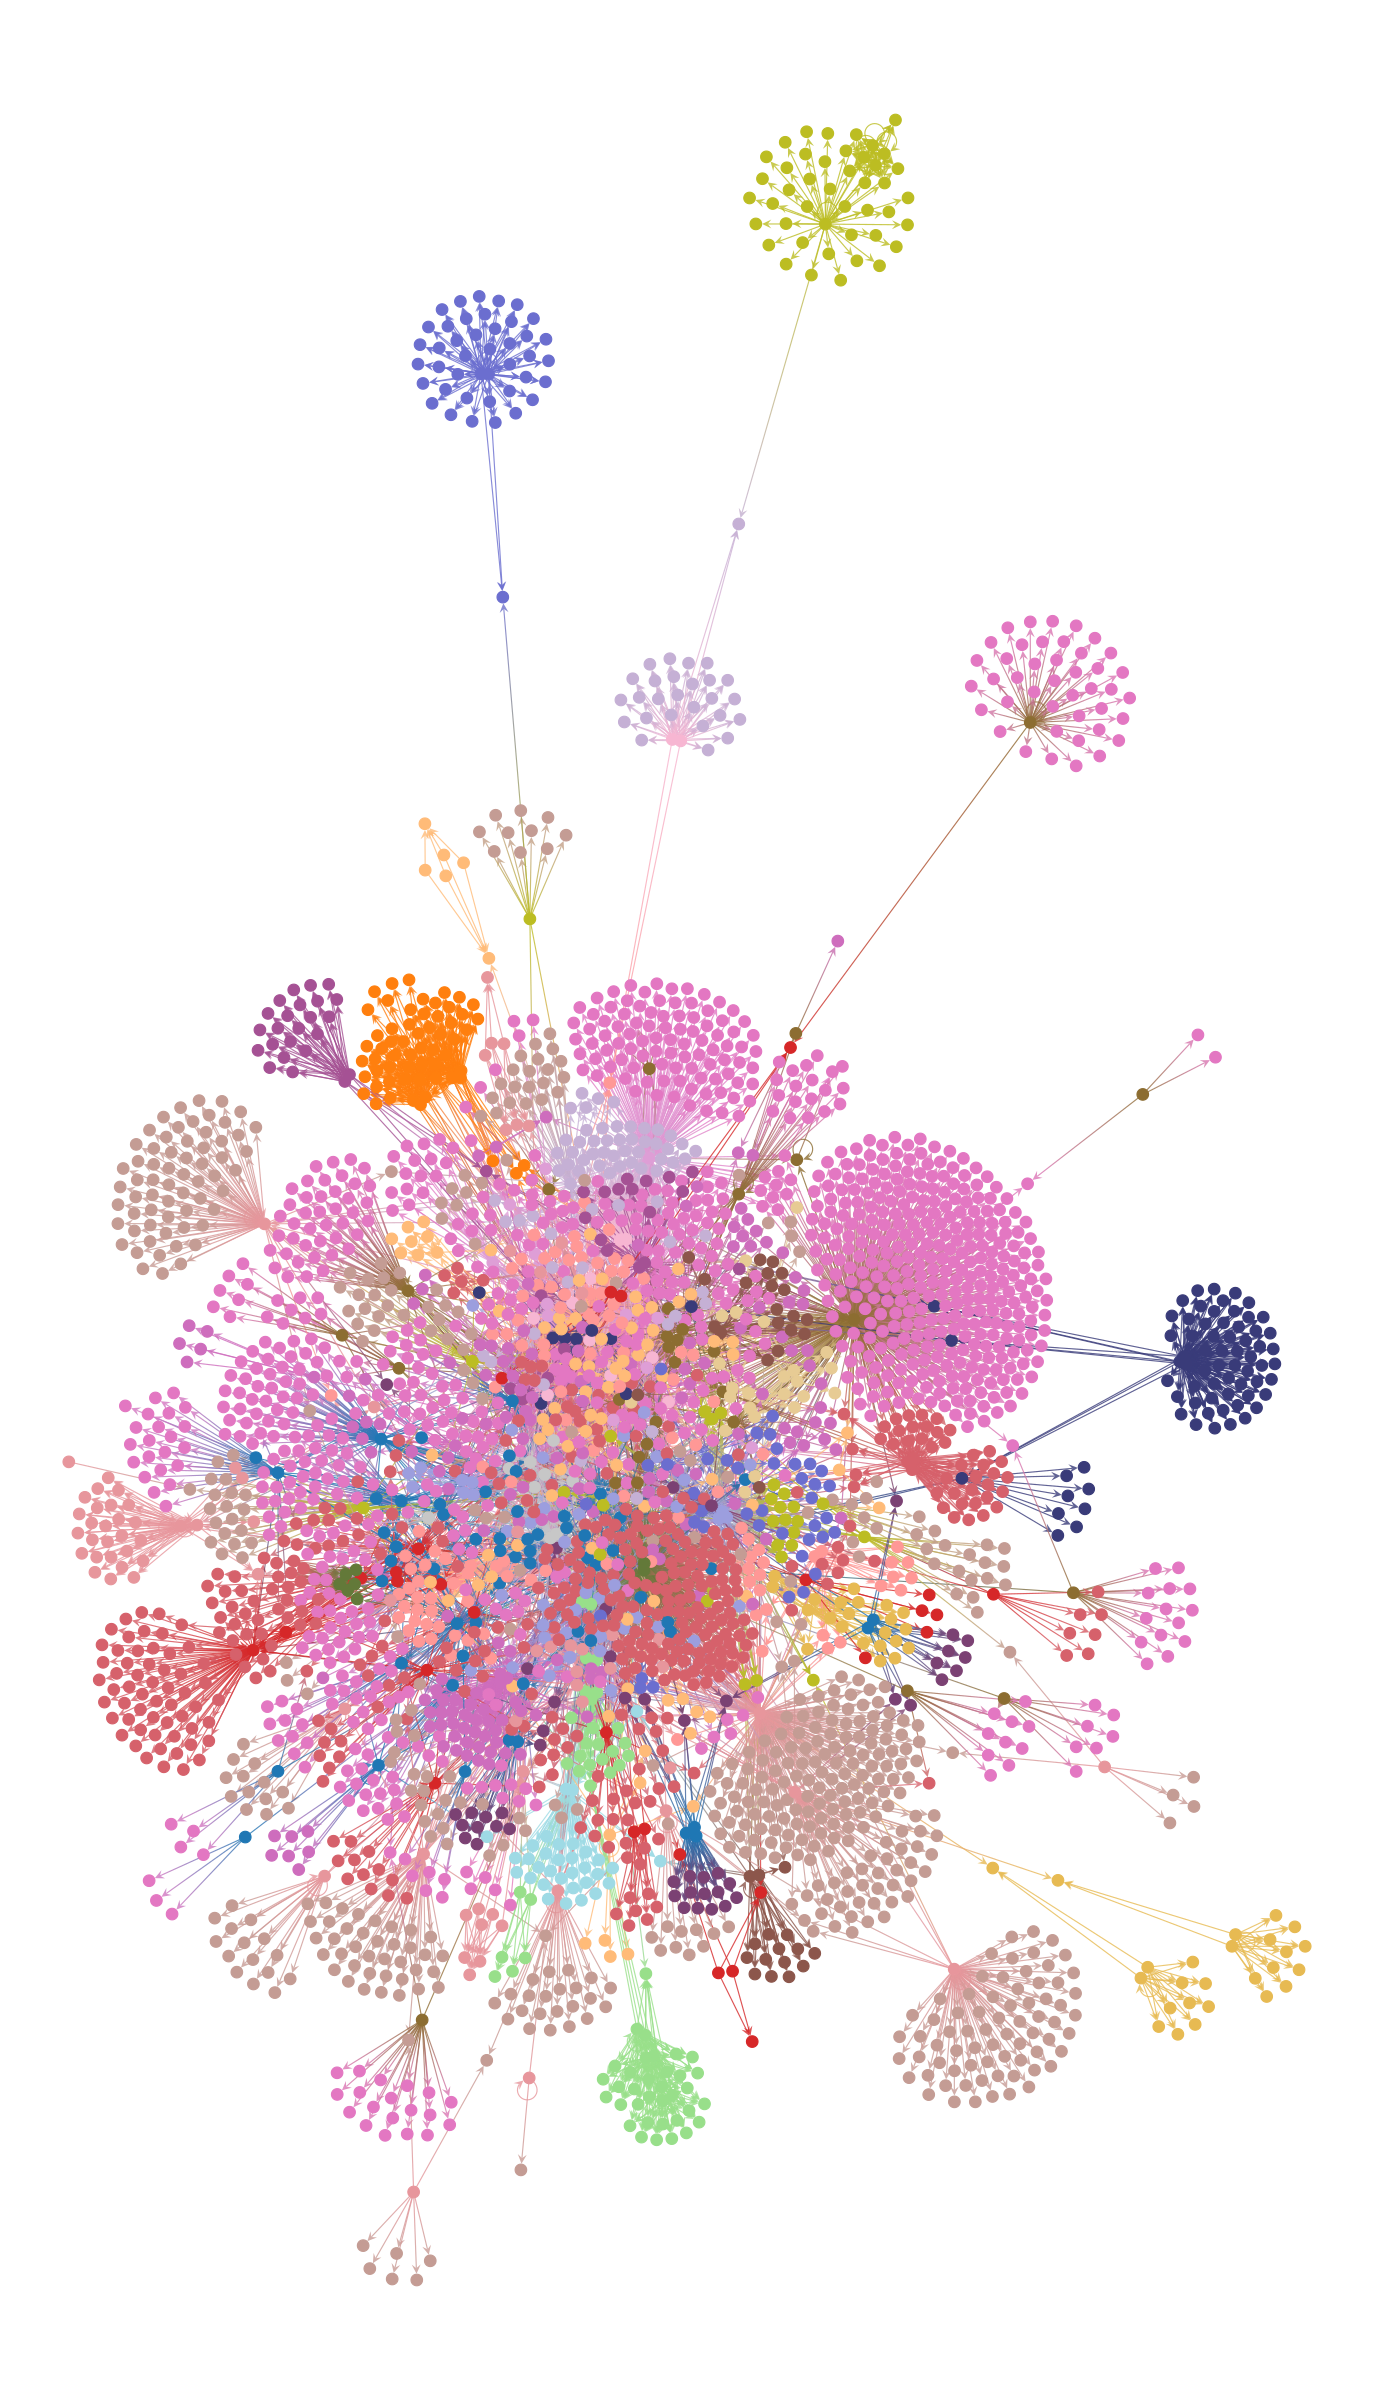

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2cd2e68d0, at 0x2db6c7260>

In [15]:
state = minimize_nested_blockmodel_dl(g)
state.levels[0].draw(pos=pos, **dprms)

In [16]:
pos2 = sfdp_layout(g, groups=state.levels[0].b, gamma=.04) 


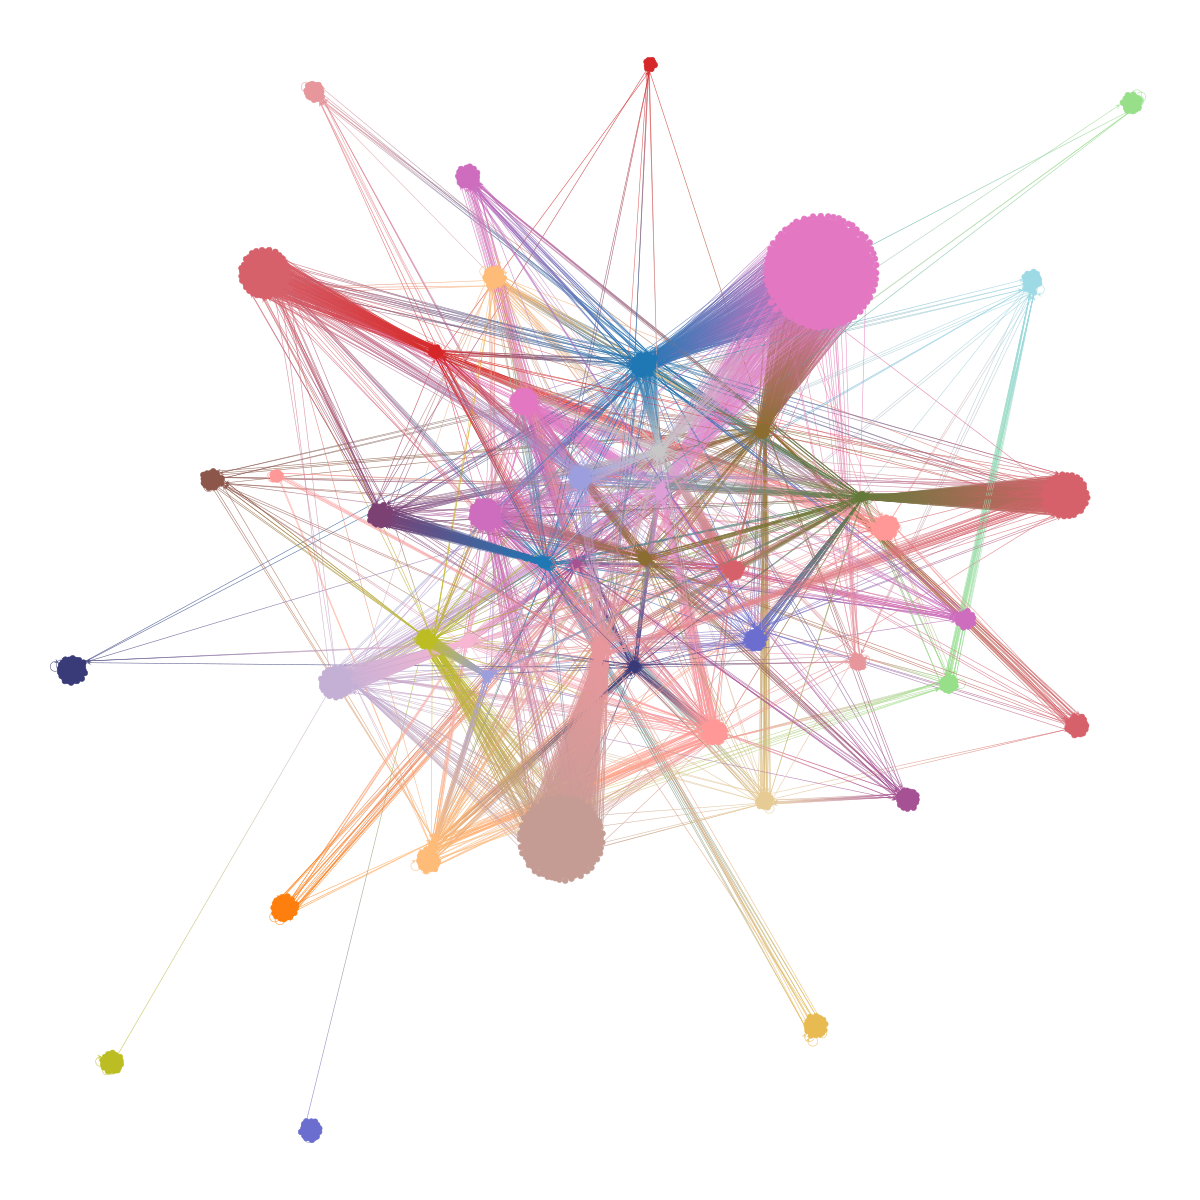

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2cd2e68d0, at 0x2dbb1b050>

In [17]:
state.levels[0].draw(pos=pos2)#, edge_gradient=[], edge_color="#33333322", **dprms)

In [46]:
#!pip install umap-learn
#!pip install sentence-transformers

pos2

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2cd2e68d0, at 0x2db6ecfb0>

In [19]:
texts_to_embedd = [
    ' '.join([y.title() if y else '' for y in G.nodes(data=True)[x].get('titles', [])])
    for x in G.nodes()
]

In [23]:
# from sentence_transformers import SentenceTransformer

# model = SentenceTransformer("all-mpnet-base-v2")#allenai-specter


# embeddings = model.encode(['texts_to_embedd']*20, show_progress_bar=True, batch_size=10)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

vectorizer = TfidfVectorizer(stop_words='english',norm='l1')
vectors = vectorizer.fit_transform(texts_to_embedd)

# Initialize the SVD object
svd = TruncatedSVD(n_components=100)
SVD_embedding = svd.fit_transform(vectors)

In [66]:
#

import matplotlib.pyplot as plt
import umap


graph_labels= state.levels[0].get_blocks()

# Apply UMAP
reducer = umap.UMAP(n_neighbors=50, min_dist=0.3, metric='cosine',target_weight=.5)
embedding = reducer.fit_transform(vectors, y=graph_labels)

<Figure size 800x800 with 0 Axes>

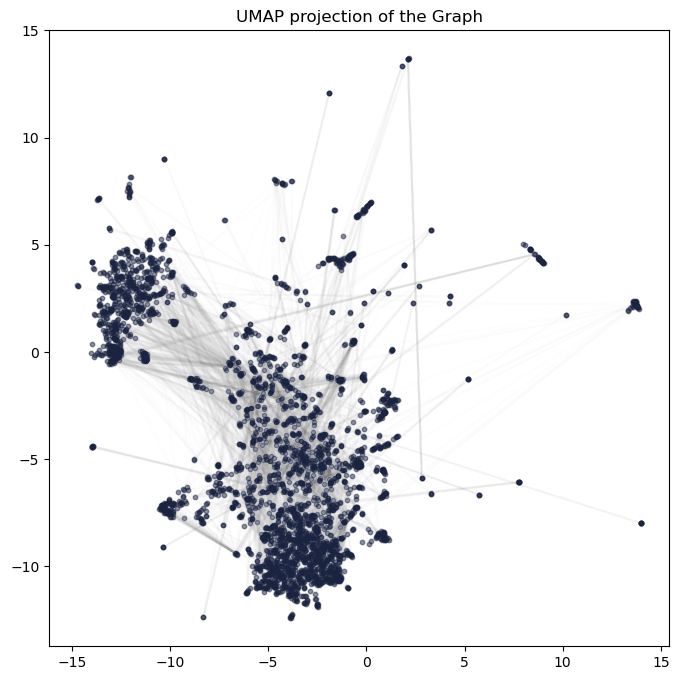

In [67]:
# Plotting
plt.figure(figsize=(8, 8))


# Prepare a mapping of node labels to indices for embedding
node_list = list(G.nodes())
node_to_index = {node: idx for idx, node in enumerate(node_list)}

# Plotting
plt.figure(figsize=(8, 8))

# Draw edges
for edge in G.edges():
    # Convert node labels to indices for the embedding
    points = embedding[[node_to_index[edge[0]], node_to_index[edge[1]]]]
    plt.plot(points[:, 0], points[:, 1], 'grey', alpha=0.01,zorder=1)

# Draw nodes
plt.scatter(embedding[:, 0], embedding[:, 1], c='white', s=10,alpha=1,zorder=2)

plt.scatter(embedding[:, 0], embedding[:, 1], c='#1a2340', s=10,alpha=.5,zorder=3)

plt.title('UMAP projection of the Graph')
plt.show()

In [68]:

import datamapplot
plot = datamapplot.create_interactive_plot(
embedding,[str(x) for x in graph_labels],
hover_text=texts_to_embedd,use_medoids=True,
    width=800,
    height=800,    point_radius_min_pixels=1,
    point_radius_max_pixels=4,

)
plot



<InteractiveFigure width=800 height=800>

In [40]:
#!pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 71.3 MB/s eta 0:00:0000:0100:01


In [70]:
!pip install dill

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.7 MB/s eta 0:00:00a 0:00:01


In [71]:
import dill

with open('perceptron_graph_pre_1979.pkl', 'wb') as f:
    dill.dump(G, f)

In [80]:
import dill

# Use dill to deserialize the graph from a file
with open('perceptron_graph_pre_1979.pkl', 'rb') as f:
    G_loaded = dill.load(f)
print(G_loaded.nodes(data=True))

[('https://openalex.org/A5076896748', {'authored_paper_count': 6, 'cited_count': 124, 'titles': ['The perceptron: A probabilistic model for information storage and organization in the brain.', 'PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND THE THEORY OF BRAIN MECHANISMS', 'Analysis of a Four-Layer Series-Coupled Perceptron. II', 'The perceptron: A probabilistic model for information storage and organization in the brain.', 'Perceptron Simulation Experiments', 'PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND THE THEORY OF BRAIN MECHANISMS', 'Perceptron Simulation Experiments', 'The perceptron: A probabilistic model for information storage and organization in the brain.', 'PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND THE THEORY OF BRAIN MECHANISMS', 'PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND THE THEORY OF BRAIN MECHANISMS', 'Analysis of a Four-Layer Series-Coupled Perceptron. II', 'PRINCIPLES OF NEURODYNAMICS. PERCEPTRONS AND THE THEORY OF BRAIN MECHANISMS', 'Analysis of a Four-Layer Seri